In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
data_folder = '/home/nao/bilhr23ss/workspace/src/tutorial_3/datasets/'

dataset = np.loadtxt(data_folder + 'data.txt')
X_train = dataset[:,:2]
Y_train = dataset[:,2:]

In [18]:
%matplotlib notebook
import matplotlib.pyplot as plt

plt.plot(X_train[:,0],'r')
plt.plot(Y_train[:,1],'b')
plt.show()

<IPython.core.display.Javascript object>

In [4]:
plt.figure()
plt.plot(X_train[:,1],'r')
plt.plot(Y_train[:,0],'b')
plt.show()

<IPython.core.display.Javascript object>

In [71]:
def init(x,y):
    
    layer=np.random.uniform(-1.,1.,size=(x,y))#/np.sqrt(x*y)
    return layer.astype(np.float32)

np.random.seed(42)
l1=init(2,1024)
l2=init(1024,2)

In [63]:
#Sigmoid funstion
def sigmoid(x):
    return 1/(np.exp(-x)+1)    

#derivative of sigmoid
def d_sigmoid(x):
    return (np.exp(-x))/((np.exp(-x)+1)**2)

In [64]:
#Softmax
def softmax(x):
    exp_element=np.exp(x-x.max())
    return exp_element/np.sum(exp_element,axis=0)

#derivative of softmax
def d_softmax(x):
    exp_element=np.exp(x-x.max())
    return exp_element/np.sum(exp_element,axis=0)*(1-exp_element/np.sum(exp_element,axis=0))

In [65]:
#forward and backward pass
def forward_backward_pass(x,y):
    targets = y
 
    
    x_l1=x.dot(l1)
    x_sigmoid=sigmoid(x_l1)
    x_l2=x_sigmoid.dot(l2)
    out=x_l2
   
 
    error=2*(out-targets)/out.shape[0]
    update_l2=np.matmul(x_sigmoid.T,error)
    
    
    error=((l2).dot(error.T)).T*d_sigmoid(x_l1)
    update_l1=np.matmul(x.T,error)

    return out,update_l1,update_l2 

In [66]:
#forward and backward pass
def forward_pass(x):
    
    x_l1 = x.dot(l1)
    x_sigmoid = sigmoid(x_l1)
    x_l2 = x_sigmoid.dot(l2)
    out = x_l2
   
    return out

In [92]:
epochs = 50000
lr = 0.00001
batch = 60

losses,accuracies,val_accuracies=[],[],[]

for i in range(epochs):
    sample=np.random.randint(0,X_train.shape[0],size=(batch))
    x=X_train[sample]
    y=Y_train[sample]
 

    out,update_l1,update_l2=forward_backward_pass(x,y)
  
    #category=np.argmax(out,axis=1)
    accuracy=((out-y)/y).mean()
    accuracies.append(accuracy)
    
    loss=((out-y)**2).mean()
    losses.append(loss.item())
    
    l1=l1-lr*update_l1
    l2=l2-lr*update_l2
   
    if(i%100==0): print('For %dth epoch: train error: %.3f ' % (i, accuracy))

For 0th epoch: train error: 0.341 
For 100th epoch: train error: 0.348 
For 200th epoch: train error: 0.072 
For 300th epoch: train error: 0.904 
For 400th epoch: train error: 0.516 
For 500th epoch: train error: 0.073 
For 600th epoch: train error: 0.477 
For 700th epoch: train error: 0.039 
For 800th epoch: train error: 0.306 
For 900th epoch: train error: 0.305 
For 1000th epoch: train error: 0.318 
For 1100th epoch: train error: 0.489 
For 1200th epoch: train error: 0.130 
For 1300th epoch: train error: 0.492 
For 1400th epoch: train error: 0.136 
For 1500th epoch: train error: 0.088 
For 1600th epoch: train error: 0.488 
For 1700th epoch: train error: 0.493 
For 1800th epoch: train error: 0.465 
For 1900th epoch: train error: 0.348 
For 2000th epoch: train error: 0.271 
For 2100th epoch: train error: 0.335 
For 2200th epoch: train error: 0.297 
For 2300th epoch: train error: 0.055 
For 2400th epoch: train error: 0.502 
For 2500th epoch: train error: 0.084 
For 2600th epoch: train 

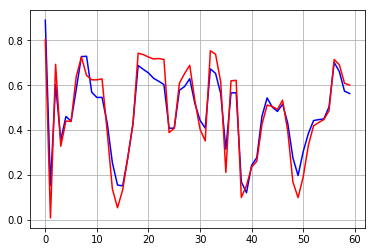

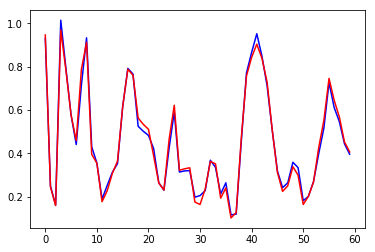

In [93]:
#print(X_train[9])
#print(Y_train[9])
%matplotlib inline
output = forward_pass(X_train[9])
x = np.arange(0,60,1)

#print(output)

fig, ax = plt.subplots()
ax.plot(x, forward_pass(X_train)[:,0], 'b')
ax.plot(x, Y_train[:,0], 'r')

#ax.set(xlabel='time (s)', ylabel='voltage (mV)',
#       title='About as simple as it gets, folks')
ax.grid()

fig, ax = plt.subplots()
ax.plot(x, forward_pass(X_train)[:,1], 'b')
ax.plot(x, Y_train[:,1], 'r')

#fig.savefig("test.png")
plt.show()


#plt.figure()
#plt.plot(Y_train[:,1],'r')
#plt.plot(forward_pass(X_train)[:,1], x,'b')
#plt.show()

In [12]:
print(l1.shape)
print(l2.shape)

(2, 128)
(128, 2)


In [94]:
with open('/home/nao/bilhr23ss/workspace/src/tutorial_3/datasets/weights-l1.txt', 'w') as f:
    for line in l1:
        for value in line:
            f.write(str(value)+' ')
        f.write('\n') 
    f.close()

In [95]:
with open('/home/nao/bilhr23ss/workspace/src/tutorial_3/datasets/weights-l2.txt', 'w') as f:
    for line in l2:
        for value in line:
            f.write(str(value)+' ')
        f.write('\n') 
    f.close() 